<a href="https://colab.research.google.com/github/AnkeHooliganke/CV/blob/main/nnformat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
! wget https://raw.githubusercontent.com/AnkeHooliganke/CV/main/NNFormat/data_train.csv

In [2]:
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [225]:
data = pd.read_csv('/content/data_train.csv')
data.head()

,timestamp,fact
0,2019-01-01 00:00:00,294.0
1,2019-01-01 01:00:00,292.0
2,2019-01-01 02:00:00,290.0
3,2019-01-01 03:00:00,293.0
4,2019-01-01 04:00:00,294.0


In [226]:
data['datetime'] = pd.to_datetime(data['timestamp'])
data.head()

,timestamp,fact,datetime
0,2019-01-01 00:00:00,294.0,2019-01-01 00:00:00
1,2019-01-01 01:00:00,292.0,2019-01-01 01:00:00
2,2019-01-01 02:00:00,290.0,2019-01-01 02:00:00
3,2019-01-01 03:00:00,293.0,2019-01-01 03:00:00
4,2019-01-01 04:00:00,294.0,2019-01-01 04:00:00


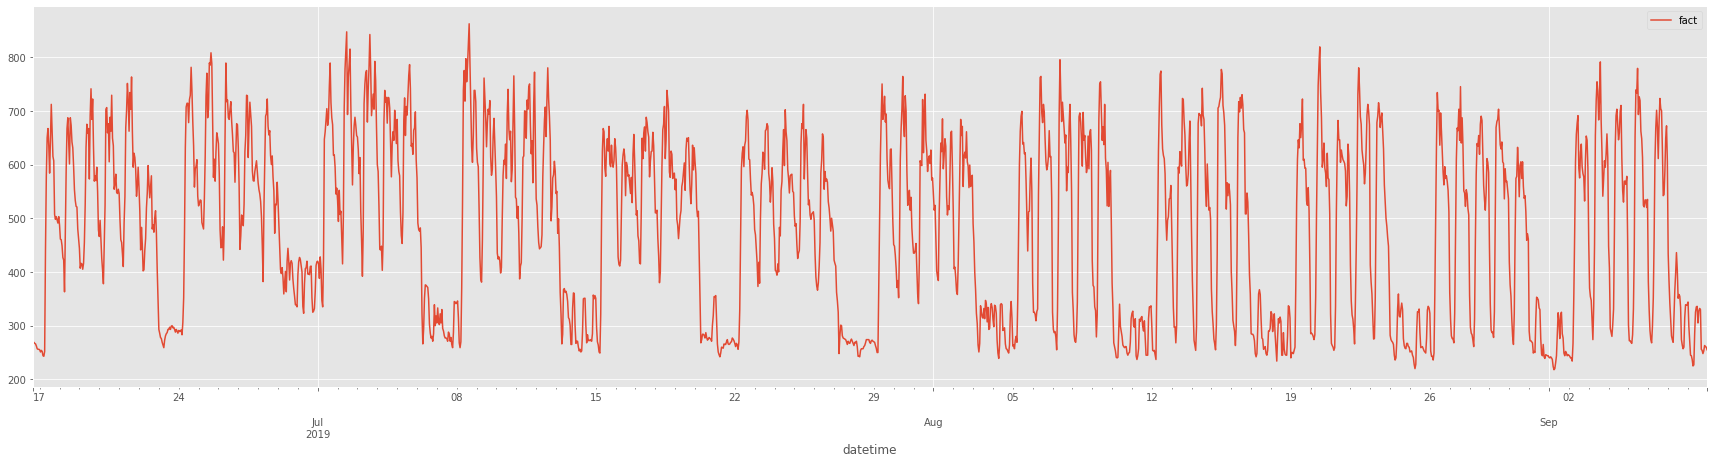

In [227]:
data.iloc[4000:].plot(x='datetime', y='fact', figsize=(30,7))

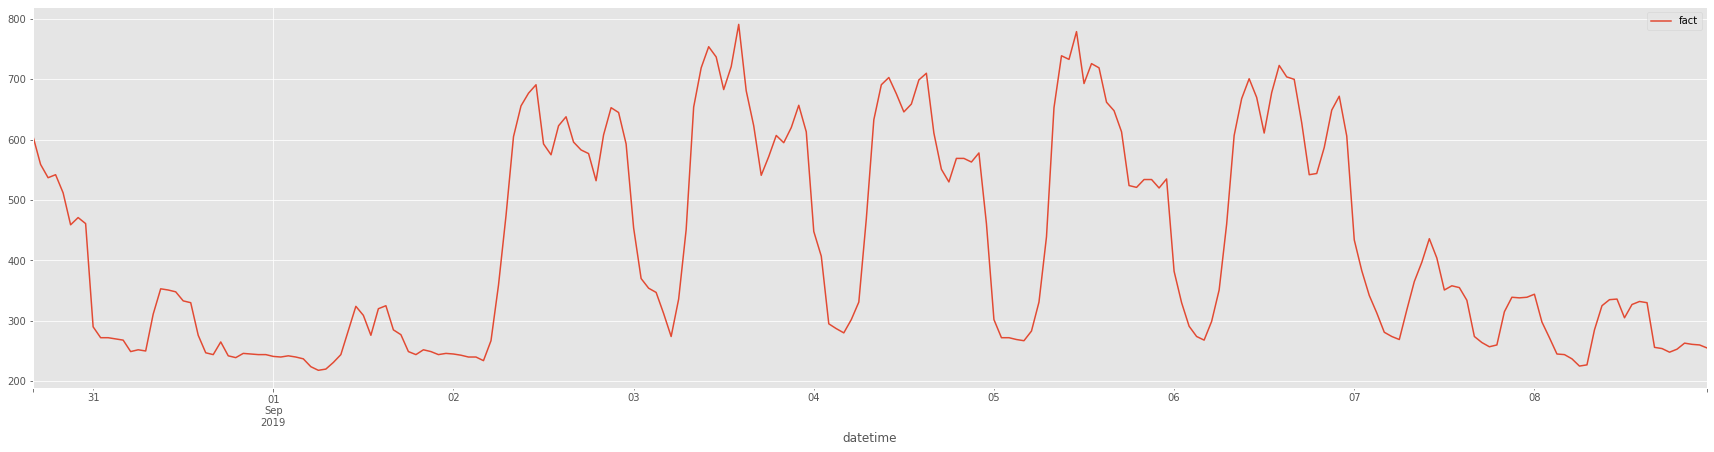

In [228]:
data.iloc[5800:].plot(x='datetime', y='fact', figsize=(30,7))

In [229]:
import time

In [230]:
data['weekday'] = data['datetime'].dt.weekday
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data.tail()

,timestamp,fact,datetime,weekday,hour,month
6019,2019-09-08 19:00:00,253.0,2019-09-08 19:00:00,6,19,9
6020,2019-09-08 20:00:00,263.0,2019-09-08 20:00:00,6,20,9
6021,2019-09-08 21:00:00,261.0,2019-09-08 21:00:00,6,21,9
6022,2019-09-08 22:00:00,260.0,2019-09-08 22:00:00,6,22,9
6023,2019-09-08 23:00:00,255.0,2019-09-08 23:00:00,6,23,9


In [232]:
data['date_num'] = data['datetime'].apply(lambda  x: time.mktime(x.timetuple()))

data['sin_date_num']  = data['date_num'].apply(lambda x: np.sin(x))
data['sin_weekday']  = data['weekday'].apply(lambda x: np.sin(x))
data['sin_month']  = data['month'].apply(lambda x: np.sin(x))
data['sin_hour']  = data['hour'].apply(lambda x: np.sin(x))

data['cos_date_num']  = data['date_num'].apply(lambda x: np.cos(x))
data['cos_weekday']  = data['weekday'].apply(lambda x: np.cos(x))
data['cos_month']  = data['month'].apply(lambda x: np.cos(x))
data['cos_hour']  = data['hour'].apply(lambda x: np.cos(x))

data.tail()

,timestamp,fact,datetime,weekday,hour,month,date_num,sin_date_num,sin_weekday,sin_month,sin_hour,cos_date_num,cos_weekday,cos_month,cos_hour
6019,2019-09-08 19:00:00,253.0,2019-09-08 19:00:00,6,19,9,1.567969e+09,-0.958800,-0.279415,0.412118,0.149877,0.284084,0.96017,-0.91113,0.988705
6020,2019-09-08 20:00:00,263.0,2019-09-08 20:00:00,6,20,9,1.567973e+09,-0.999739,-0.279415,0.412118,0.912945,0.022867,0.96017,-0.91113,0.408082
6021,2019-09-08 21:00:00,261.0,2019-09-08 21:00:00,6,21,9,1.567976e+09,-0.970786,-0.279415,0.412118,0.836656,-0.239947,0.96017,-0.91113,-0.547729
6022,2019-09-08 22:00:00,260.0,2019-09-08 22:00:00,6,22,9,1.567980e+09,-0.873966,-0.279415,0.412118,-0.008851,-0.485987,0.96017,-0.91113,-0.999961
6023,2019-09-08 23:00:00,255.0,2019-09-08 23:00:00,6,23,9,1.567984e+09,-0.716047,-0.279415,0.412118,-0.846220,-0.698052,0.96017,-0.91113,-0.532833


In [233]:
train = data.loc[data['datetime'] < '2019-08-26 00:00:00']
test = data.loc[data['datetime'] >= '2019-08-26 00:00:00']
train.tail()

,timestamp,fact,datetime,weekday,hour,month,date_num,sin_date_num,sin_weekday,sin_month,sin_hour,cos_date_num,cos_weekday,cos_month,cos_hour
5683,2019-08-25 19:00:00,249.0,2019-08-25 19:00:00,6,19,8,1.566760e+09,-0.145996,-0.279415,0.989358,0.149877,0.989285,0.96017,-0.1455,0.988705
5684,2019-08-25 20:00:00,276.0,2019-08-25 20:00:00,6,20,8,1.566763e+09,-0.400168,-0.279415,0.989358,0.912945,0.916442,0.96017,-0.1455,0.408082
5685,2019-08-25 21:00:00,329.0,2019-08-25 21:00:00,6,21,8,1.566767e+09,-0.626365,-0.279415,0.989358,0.836656,0.779530,0.96017,-0.1455,-0.547729
5686,2019-08-25 22:00:00,336.0,2019-08-25 22:00:00,6,22,8,1.566770e+09,-0.808773,-0.279415,0.989358,-0.008851,0.588121,0.96017,-0.1455,-0.999961
5687,2019-08-25 23:00:00,333.0,2019-08-25 23:00:00,6,23,8,1.566774e+09,-0.934639,-0.279415,0.989358,-0.846220,0.355597,0.96017,-0.1455,-0.532833


In [234]:
X_train = train[['weekday', 'hour', 'month', 'date_num', 
       'sin_date_num', 'sin_weekday', 'sin_month', 'sin_hour',
        'cos_date_num', 'cos_weekday', 'cos_month', 'cos_hour']]

X_test = test[['weekday', 'hour', 'month',  'date_num', 
       'sin_date_num', 'sin_weekday', 'sin_month', 'sin_hour',
        'cos_date_num', 'cos_weekday', 'cos_month', 'cos_hour']]

y_train = train['fact']
y_test = test['fact']
X_train.head()

,weekday,hour,month,date_num,sin_date_num,sin_weekday,sin_month,sin_hour,cos_date_num,cos_weekday,cos_month,cos_hour
0,1,0,1,1.546301e+09,-0.885371,0.841471,0.841471,0.000000,0.464885,0.540302,0.540302,1.000000
1,1,1,1,1.546304e+09,-0.976262,0.841471,0.841471,0.841471,0.216594,0.540302,0.540302,0.540302
2,1,2,1,1.546308e+09,-0.998902,0.841471,0.841471,0.909297,-0.046840,0.540302,0.540302,-0.416147
3,1,3,1,1.546312e+09,-0.951710,0.841471,0.841471,0.141120,-0.306999,0.540302,0.540302,-0.989992
4,1,4,1,1.546315e+09,-0.837984,0.841471,0.841471,-0.756802,-0.545696,0.540302,0.540302,-0.653644


# Baseline: Linear Regression

In [235]:
from sklearn.linear_model import LinearRegression


test_results = pd.DataFrame(columns=['y_true'], index=y_test.index)
test_results['y_true'] = y_test

linreg_X_train = X_train[['sin_date_num', 'sin_weekday', 'sin_month', 'sin_hour',
        'cos_date_num', 'cos_weekday', 'cos_month', 'cos_hour']]
linreg_X_test = X_test[['sin_date_num', 'sin_weekday', 'sin_month', 'sin_hour',
        'cos_date_num', 'cos_weekday', 'cos_month', 'cos_hour']]

In [236]:
def linreg_pipeline(linreg, name='linreg', start=0, stop=5351):

  START, STOP = start, stop
  linreg_X_train_short = linreg_X_train.iloc[START: STOP]

  linreg.fit(linreg_X_train_short, y_train.iloc[START: STOP])
  linreg_y_train_pred = linreg.predict(linreg_X_train_short)
  linreg_y_test_pred = linreg.predict(linreg_X_test)

  train_results = pd.DataFrame(columns=['y_true', 'y_linreg'], index=y_train.iloc[START: STOP].index)

  train_results['y_true'] = y_train.iloc[START: STOP]
  train_results['y_{}'.format(name)] = linreg_y_train_pred

  test_results['y_{}'.format(name)] = linreg_y_test_pred

  return train_results, linreg

In [237]:
def RMSE(true, pred):
  return np.sqrt((true - pred)**2).mean()

train RMSE:  98.89738325280197
test RMSE:  153.36941967114404


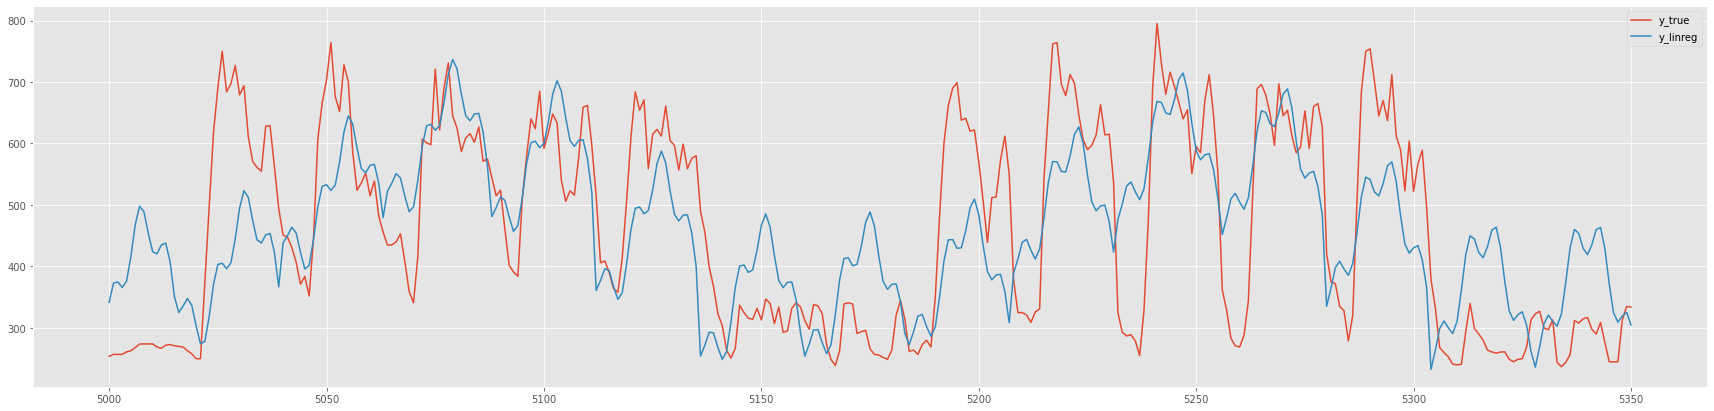

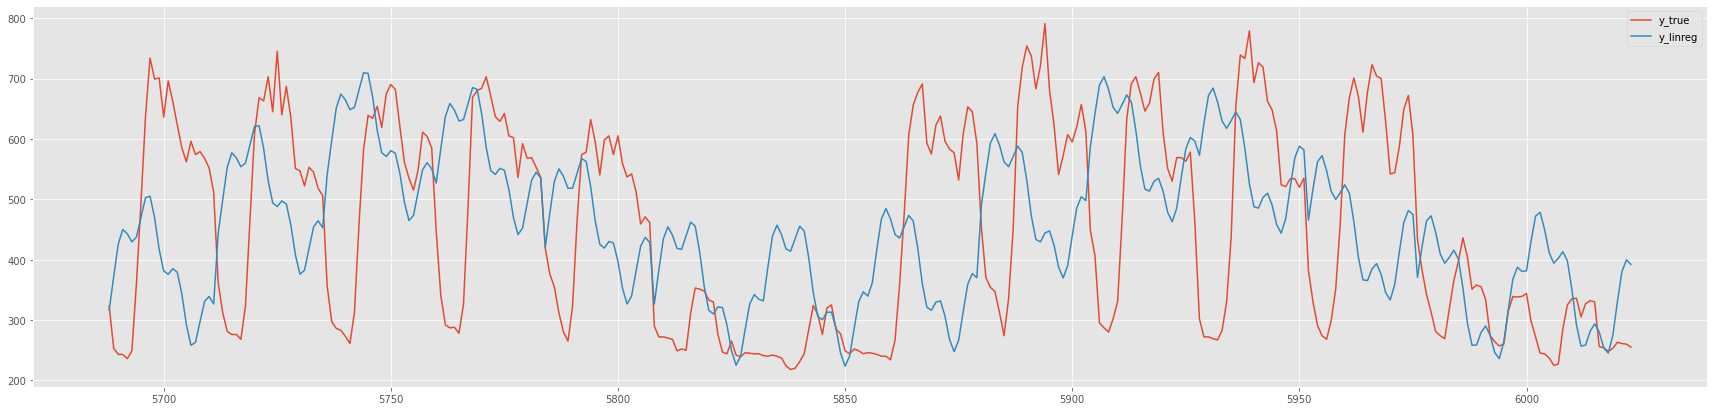

In [238]:
linreg = LinearRegression()
train_results, linreg = linreg_pipeline(linreg, start=5000)
train_results.plot(figsize=(30,7))
print('train RMSE: ', RMSE(train_results['y_true'], train_results['y_linreg']))
test_results.plot(figsize=(30,7))
print('test RMSE: ', RMSE(test_results['y_true'], test_results['y_linreg']))

best start_num:  3600  best_test RMSE:  123.93704347149523


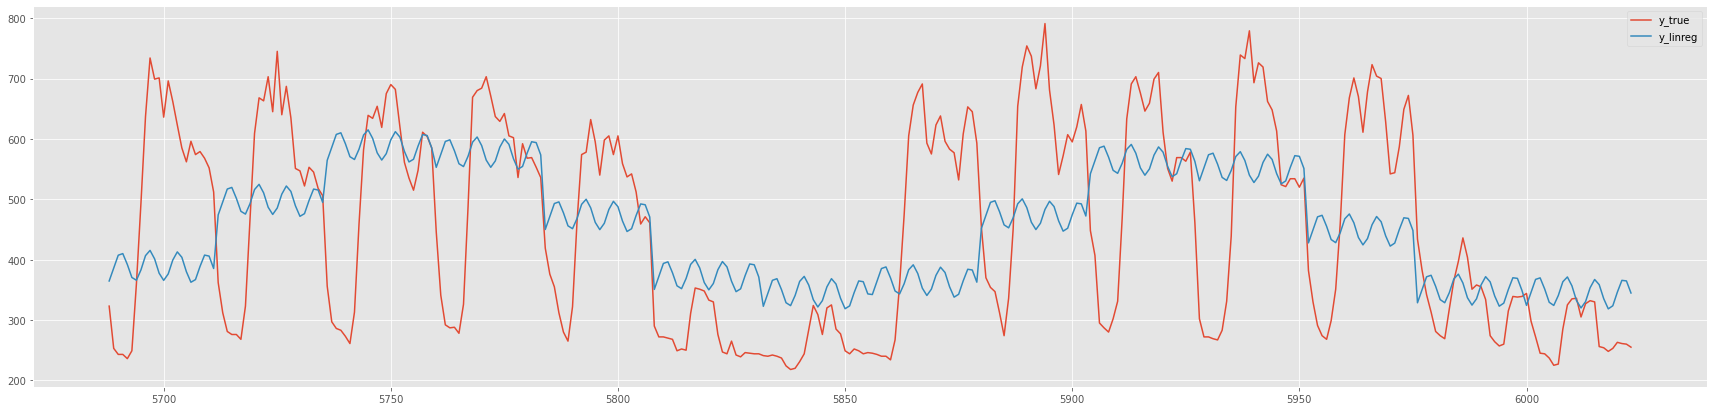

In [239]:
start_best = 0
rmse_min = 100000
for _start in range(0, 5000, 100):
  linreg = LinearRegression()
  train_results, linreg = linreg_pipeline(linreg, start=_start)
  rmse = RMSE(test_results['y_true'], test_results['y_linreg'])
  if rmse < rmse_min:
    start_best = _start
    rmse_min = rmse
  
linreg = LinearRegression()  
train_results, linreg = linreg_pipeline(linreg, start=start_best)
test_results.plot(figsize=(30,7))
print('best start_num: ', start_best, ' best_test RMSE: ', RMSE(test_results['y_true'], test_results['y_linreg']))

In [ ]:
# сомнительный оптимум

# LSTM model

In [48]:
import torch 
import torch.nn as nn
device = torch.device('cpu')

In [168]:
train_lstm = y_train.to_numpy()
test_lstm = y_test.to_numpy()

train_mean = np.mean(train_lstm)
train_var = np.var(train_lstm)
train_lstm = (train_lstm - train_mean) / np.sqrt(train_var)
test_lstm = (test_lstm - train_mean) / np.sqrt(train_var)

train_size = train_lstm.shape[0]
seq_len = 1000

In [169]:
train_seq = np.zeros((train_size - seq_len, seq_len))
for i in range(train_size - seq_len):
  train_seq[i] = train_lstm[i: i + seq_len]

X_train_seq = train_seq[:, :-1]
y_train_seq = train_seq[:, -1]


test_seq_torch = torch.tensor(test_lstm, dtype=torch.double)

In [170]:
X_train_seq_torch = torch.tensor(train_seq[:, :-1])
y_train_seq_torch = torch.tensor(train_seq[:, -1])                     
y_train_seq_torch.shape

torch.Size([4688])

In [171]:
X_train_seq_torch.shape, y_train_seq_torch.shape

(torch.Size([4688, 999]), torch.Size([4688]))

In [172]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers):
      super(LSTM, self).__init__()

      self.hidden_size = hidden_size
      self.num_layers = num_layers
      self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
      self.lin = nn.Linear(hidden_size, output_size)


  def forward(self, input):
      out, hidden = self.lstm(input.view(len(input), 1, -1))
      out = self.lin(out.view(len(input), -1))
      return out


In [203]:
model = LSTM(seq_len - 1, 32, 1, 1).double()
loss_func = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)
model.to(device)


LSTM(
  (lstm): LSTM(999, 32)
  (lin): Linear(in_features=32, out_features=1, bias=True)
)

In [18]:
from random import sample

from IPython.display import clear_output

In [204]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 256

train_ds = TensorDataset(X_train_seq_torch, y_train_seq_torch)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False, drop_last=True)

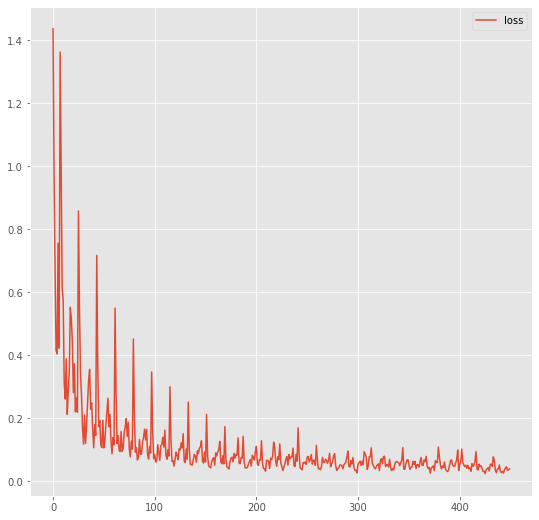

current loss: 0.039198568781669926


In [205]:
n_epoch = 25

history = []

model.train()

for i in range(n_epoch):
    
    for batch_x, batch_y in train_loader:

      batch_x = batch_x.to(device)
      batch_y = batch_y.to(device)

      pred = model(batch_x)
      
      predictions = pred[:, 0]
      actual = batch_y

      loss = loss_func(predictions, actual)
      
      opt.zero_grad()
      loss.backward()
      opt.step()
      
      history.append(loss.data.cpu().detach().numpy())
      clear_output(True)
      plt.figure(figsize=(9, 9))
      plt.plot(history,label='loss')
      plt.legend()
      plt.show()
      print('current loss:', history[-1])

In [206]:
test_seq_torch.shape

torch.Size([336])

In [207]:
seed = train_seq[-1, :]
seed = torch.tensor(seed[:-1])
num_preds = test_seq_torch.shape[0]

In [208]:
seed.shape

torch.Size([999])

In [209]:
with torch.no_grad():
  model.eval()
  predictions = []
  values = []
  seed = seed.to(device)
  for i in range(num_preds):
      pred = model(seed.view(1, len(seed)))[:, 0]
      predictions.append(pred.to(device).detach().numpy())
      new_seed = torch.zeros_like(seed)
      new_seed[:-1] = seed[1:]
      new_seed[-1] = pred
      seed = new_seed.to(device)


In [210]:
preds = np.array(predictions).reshape(num_preds)
preds = preds * np.sqrt(train_var) + train_mean
test_results['lstm'] = preds

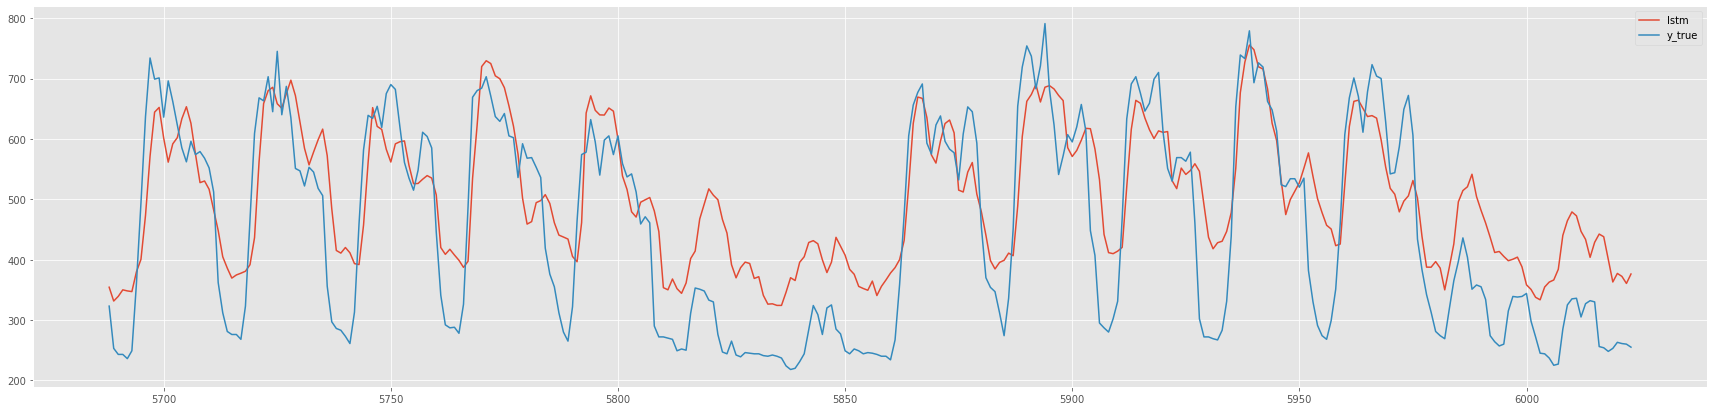

In [211]:
test_results.plot(figsize=(30,7), y=['lstm',  'y_true'])

In [212]:
print('RMSE: ', RMSE(test_results['lstm'], test_results['y_true']))

RMSE:  87.46658443774129


# New predictions

In [216]:
new_predictions = pd.DataFrame(columns=['prediction'], index=pd.date_range(start='9/9/2019', end='22/09/2019', freq='H'))
num_preds = len(new_predictions)

In [217]:
seed = data['fact'].iloc[-999:]
seed = torch.tensor(seed.to_numpy())
seed.shape

torch.Size([999])

In [218]:
with torch.no_grad():
  model.eval()
  predictions = []
  values = []
  seed = seed.to(device)
  for i in range(num_preds):
      pred = model(seed.view(1, len(seed)))[:, 0]
      predictions.append(pred.to(device).detach().numpy())
      new_seed = torch.zeros_like(seed)
      new_seed[:-1] = seed[1:]
      new_seed[-1] = pred
      seed = new_seed.to(device)


In [219]:
preds = np.array(predictions).reshape(num_preds)
preds = preds * np.sqrt(train_var) + train_mean
new_predictions['prediction'] = preds

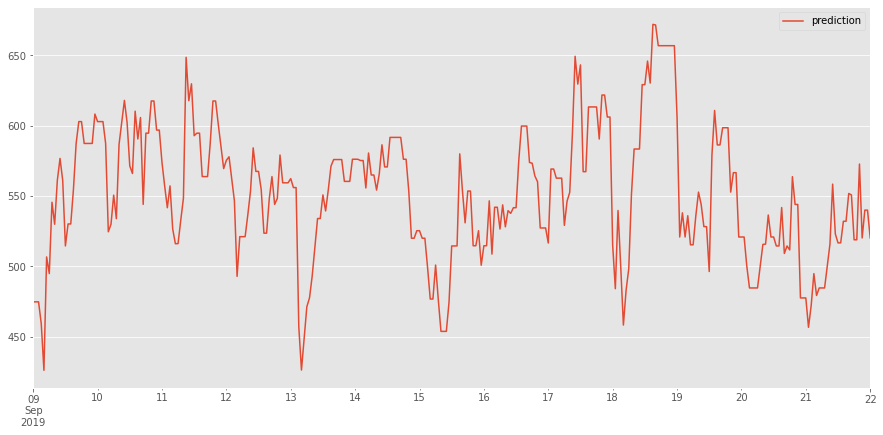

In [221]:
new_predictions.plot(figsize=(15,7))

In [223]:
new_predictions.to_csv('/content/predictions.csv')